# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write vectorized code whenever possible.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in the provided `hw2.py` python module only. All the logic you write is imported and used in this jupyter notebook.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports detected in `hw2.py` will earn you the grade of 0, even if you only used them for testing.
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install. Changes of the configuration we provided are at your own risk. Code that cannot run will also earn you the grade of 0.
7. Write your own code. Cheating will not be tolerated. 
8. Submission includes the `hw2.py` file and this notebook. Answers to qualitative questions should be written in markdown cells (with $\LaTeX$ support).
9. You are allowed to include additional functions.
10. Submission: zip only the completed jupyter notebook and the python file `hw2.py`. Do not include the data or any directories. Name the file `ID1_ID2.zip` and submit only one copy of the assignment.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Implement a decision tree from scratch.
4. Prune the tree to achieve better results.
5. Visualize your results and the tree.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw2 import * # this imports all functions from hw2.

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Warmup - OOP in python

Our decision tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x1c8288b8358>, <__main__.Node at 0x1c8288b8470>]

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn - a popular machine learning and data science library in python. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures

Implement the functions `calc_gini` (5 points) and `calc_entropy` (5 points) in the python file `hw2.py`. You are encouraged to test your implementation using the cell below.

In [5]:
gini = calc_gini(X_train)
entropy = calc_entropy(X_train)
print(gini)
print(entropy)

0.47768299940488
0.9675594819018212


## Building a Decision Tree

Use a Python class to construct the decision tree (look at the `DecisionNode` class in the python file `hw2.py`. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. In this exercise, create at most a single split for each node of the tree. The threshold you need to use for this exercise are the average of each consecutive pair of values. For example, assume some features contains the following values: [1,2,3,4,5]. You should use the following thresholds [1.5, 2.5, 3.5, 4.5]. 
4. When constructing the tree, test all possible thresholds for each feature. The stopping criteria is a pure tree.

Complete the class `DecisionNode` in the python file `hw2.py`. The structure of this class is entirely up to you. Complete the function `build_tree` in the python file `hw2.py`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points).

In [6]:
# python support passing a function as arguments to another function.
tree_gini = build_tree(X_train, calc_gini, 1) 
tree_entropy = build_tree(X_train, calc_entropy, 1)

## Tree evaluation

Complete the functions `predict` and `calc_accuracy` in the python file `hw2.py`. You are allowed to implement this functionality as a class method.

After building both trees using the training set (using Gini and Entropy as impurity measures), you should calculate the accuracy on the test set and print the measure that gave you the best test accuracy. For the rest of the exercise, use that impurity measure. (10 points)

In [7]:
#### Your code here ####
print(calc_accuracy(tree_gini, X_test))
print(calc_accuracy(tree_entropy, X_test))

93.00699300699301
93.7062937062937


## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the p-value. What p-value gives you the best results? Does the results support the theory you learned in class regarding Chi square pruning? Explain. (20 points)

**Note**: You need to change the `DecisionNode` to support Chi square pruning. Make sure the `chi_value=1` corresponds to no pruning. The values you need from the Chi square table are available in the python file `hw2.py`.

In [8]:
training = []
testing  = []

for chi_value in [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]:
    tree_entropy = pre_pruning(X_train, calc_entropy, chi_value)
    
    trainAcc = calc_accuracy(tree_entropy, X_train)
    testAcc = calc_accuracy(tree_entropy, X_test)
    
    training.append(trainAcc)
    testing.append(testAcc)

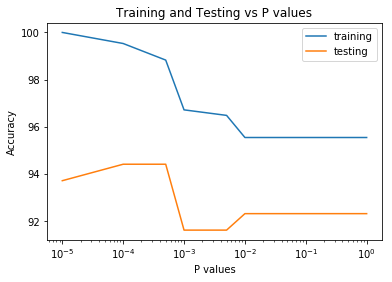

In [9]:
values = [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001][::-1]
plt.plot(values, training, label = 'training')
plt.plot(values, testing, label = 'testing')
plt.xscale('log')
plt.xlabel('P values')
plt.ylabel('Accuracy')
plt.title('Training and Testing vs P values')
plt.legend()
plt.show()

First we can see in the blue line, training data, that we start with perfect accuracy, this is because the tree was built spacificlly for this data. And as we decrese the chi square value, we prune the tree more and more and the accuracy drops. 
This makes sences because as we talked in class when we prune the tree we can have multiple instances in the leafs.
This will result in wrong classification on the training data. 
When looking at the test data, also as we talked in class, after pruning a curtain amount the accuracy improves, this means that we were overfiting the training data. 
After continuing the pruning the accuracy drops, for this example we will chose the value of 0.01 because for this value
the test and training accuracy values are the highest.

## Post pruning

Construct a decision tree without Chi square pruning. For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with just the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree. Explain the results: what would happen to the training and testing accuracies when you remove nodes from the tree? Can you suggest a different approach to achieve better results? (20 points)

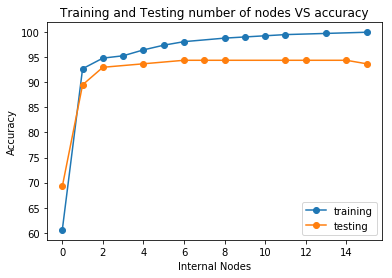

In [10]:
training_internal_nodes = []
training_acc = []
testing_internal_nodes  = []
testing_acc  = []

tree_post_pruning_train = build_tree(X_train, calc_entropy, 1)
tree_post_pruning_test = build_tree(X_train, calc_entropy, 1)

training_internal_nodes, training_acc = post_pruning(tree_post_pruning_train, X_train)
testing_internal_nodes, testing_acc = post_pruning(tree_post_pruning_test, X_test)

plt.xscale('linear')
plt.xscale('linear')
plt.xlabel('Internal Nodes')
plt.ylabel('Accuracy')
plt.plot(training_internal_nodes, training_acc, marker = 'o')
plt.plot(testing_internal_nodes, testing_acc, marker = 'o')
plt.title('Training and Testing number of nodes VS accuracy')
plt.legend(['training', 'testing'])
plt.show()


The results are as we talked in calss, we can see that the training accuracy drops with each node we delete from the tree, this is clear because as we talked in class the tree was specifically made to fit the training data. 
The accuracy of the test data is increased after we delete the first leaf. This is due to the fact that we were a little bit overfiting. 
Overall we can see that as we drop nodes from the tree the accuracy drops as well, but surprisingly we get relatively good accuracy even when we are left with 4-6 internal nodes. 
When we are left with only a single node, the root, the accuracy drops substantially.

To improve the pruning:
At each time we delet a leaf we only compare it to other leafs in tree, to improve the accuracy we need to compare it also to his father, and other leafs fathers. What we mean is that there are a lot of combination of leaf deleting that we didnt try.
What we suggest is to run a pre pruning function that deletes all possible combinations of nodes, only possible, this is much more time consuming but could yield better results.

## Print the tree

Complete the function `print_tree` in the python file `hw2.py` and print the tree using the chosen impurity measure and no pruning. Your code should like something like this (10 points):
```
[X0 <= 1],
  [X1 <= 2]
    [X2 <= 3], 
       leaf: [{1.0: 10}]
       leaf: [{0.0: 10}]
    [X4 <= 5], 
       leaf: [{1.0: 5}]
       leaf: [{0.0: 10}]
   leaf: [{1.0: 50}]
```


In [11]:
tree_post_pruning = build_tree(X_train, calc_entropy, 1)
print("Full tree")
print_tree(tree_post_pruning, 0)
post_pruning(tree_post_pruning, X_train)
print("Fully pruned tree")
print_tree(tree_post_pruning, 0)

Full tree
[X27 <= 0.142]
  [X3 <= 696.250]
    [X27 <= 0.135]
      [X10 <= 0.626]
        [X21 <= 33.350]
          leaf: [{1.0, 216}]
          [X21 <= 33.560]
            leaf: [{0.0, 1}]
            leaf: [{1.0, 17}]
        [X1 <= 18.630]
          leaf: [{0.0, 1}]
          leaf: [{1.0, 2}]
      [X15 <= 0.027]
        [X0 <= 13.225]
          leaf: [{1.0, 1}]
          leaf: [{0.0, 4}]
        leaf: [{1.0, 6}]
    [X1 <= 19.720]
      [X6 <= 0.073]
        leaf: [{1.0, 7}]
        leaf: [{0.0, 3}]
      leaf: [{0.0, 13}]
  [X13 <= 21.925]
    [X21 <= 29.000]
      [X1 <= 20.520]
        leaf: [{1.0, 8}]
        leaf: [{0.0, 1}]
      leaf: [{0.0, 5}]
    [X4 <= 0.079]
      leaf: [{1.0, 1}]
      leaf: [{0.0, 140}]
Fully pruned tree
leaf: [{1.0, 258}]
